# **Data Visualization 2 - Charting with Python - Lecture 1 - Bar charts**
---

Firstly, let's import Plotly and Plotly express.

In [55]:
# importing the libraries that we are gonna use
import plotly
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.templates.default = 'plotly'

In [56]:
# taking a look at the gapminder data set
df = px.data.gapminder()

# using the built-in dataframe table view, no need to use print()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


# **1. Bar charts**

Bar charts are one of the  basic chart types provided by Plotly Express.

We want to visualize the population distribution of USA with the gapminder sample dataset on a bar chart.

How would we get started?

## Filtering the data

In [57]:
# creating the filtered dataframe which contains the US records only
df_us = px.data.gapminder().query('country == "United States"')

# show the dataframe
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.44,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.49,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.21,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.76,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.34,209896000,21806.03594,USA,840


## Base version

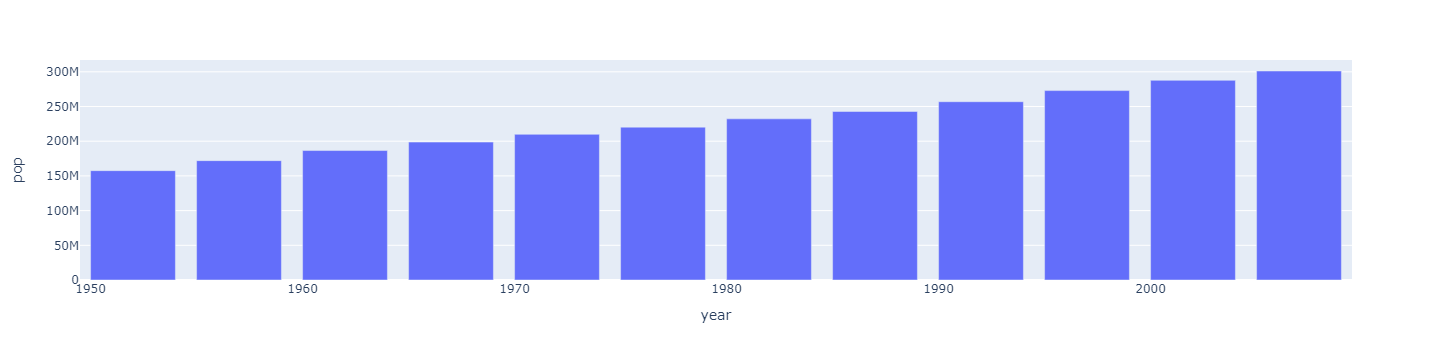

In [58]:
# creating the bar chart
fig = px.bar(df_us, x = 'year', y = 'pop')

# rendering the chart
fig.show()

## Changing the background color

We can quickly change the background color of our chart by updating the `plot_bgcolor` attribute of the `update_layout()` method.

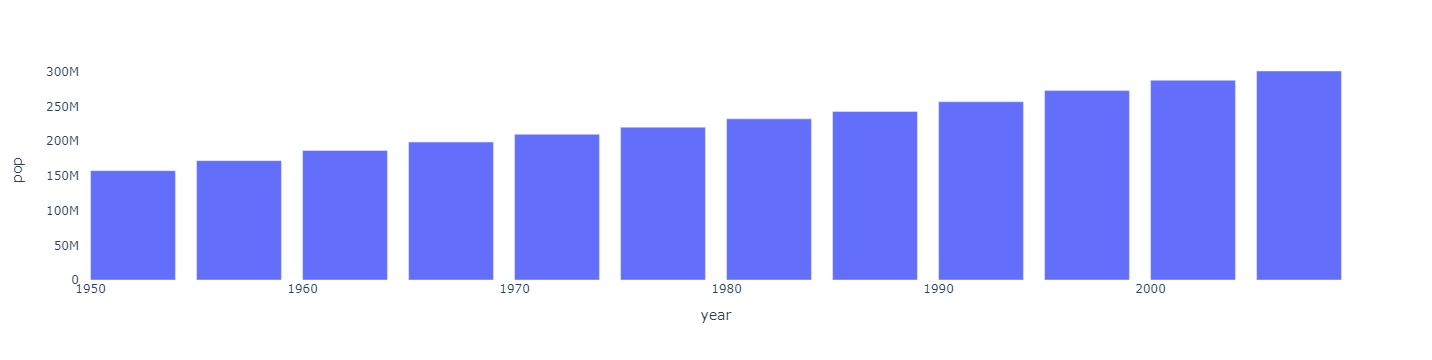

In [59]:
fig.update_layout(plot_bgcolor = 'white')

## Title customization

We can see that Plotly auto-labels our chart with the column names of our data frame but there is no title by default.

How would we need to modify our initial Plotly Express call to add a title?

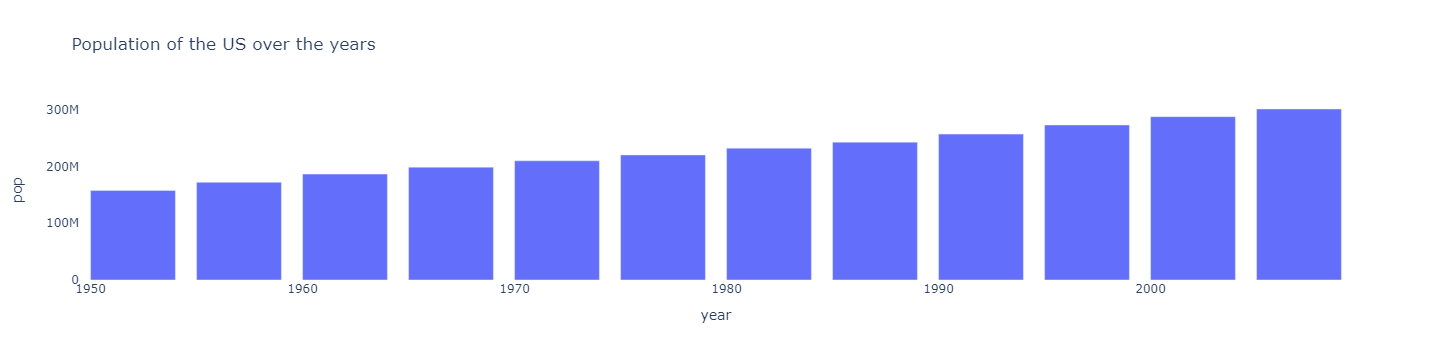

In [60]:
# adding the title parameter to our initial chart
fig = px.bar(df_us, x = 'year', y = 'pop',
              title = 'Population of the US over the years')

fig.update_layout(plot_bgcolor = 'white')

fig.show()

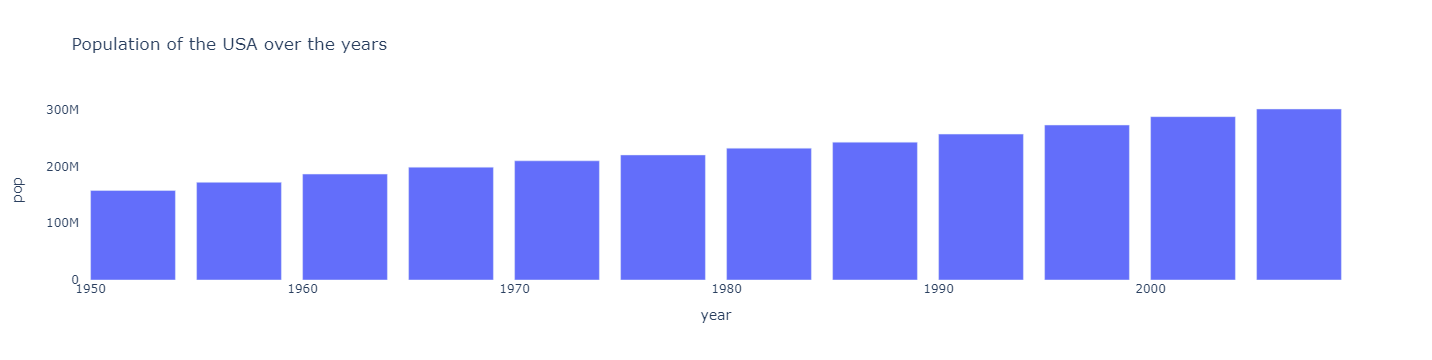

In [61]:
# you can also update the existing chart and set the title
fig.update_layout(title_text="Population of the USA over the years")

### Positioning

Plotly auto adjusts the title to the left. Which attribute can we use to change this?

The easiest way of aligning the title horizontally is modifying the **`title_x`** attribute's value of the **`update_layout()`** method.

**`title_x`** is used to align the title in a horizontal motion and accepts a value from 0 to 1.

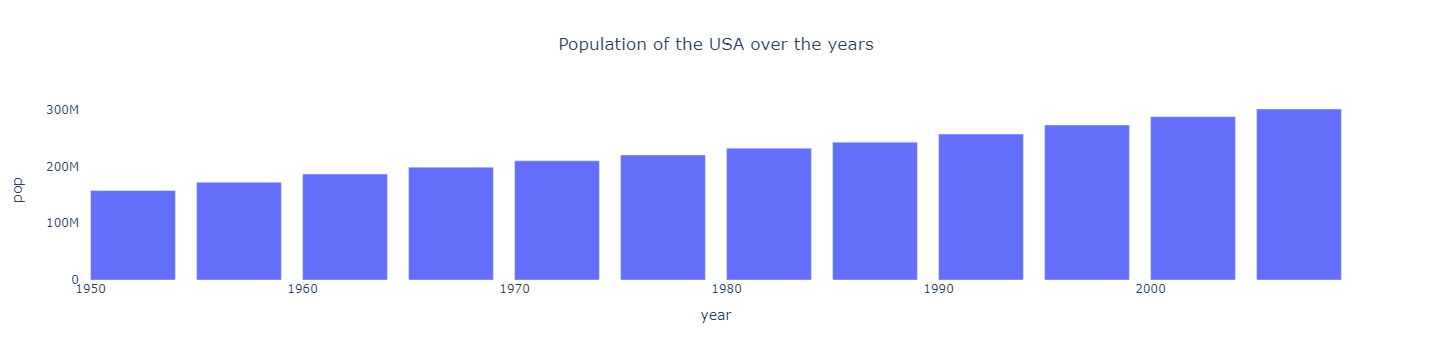

In [62]:
# aligning the title in the middle
fig.update_layout(title_x = 0.5)

### Font family

Updating the title's font family can be done by setting the value of the **`title_font_family`** attribute of **`update_layout()`**

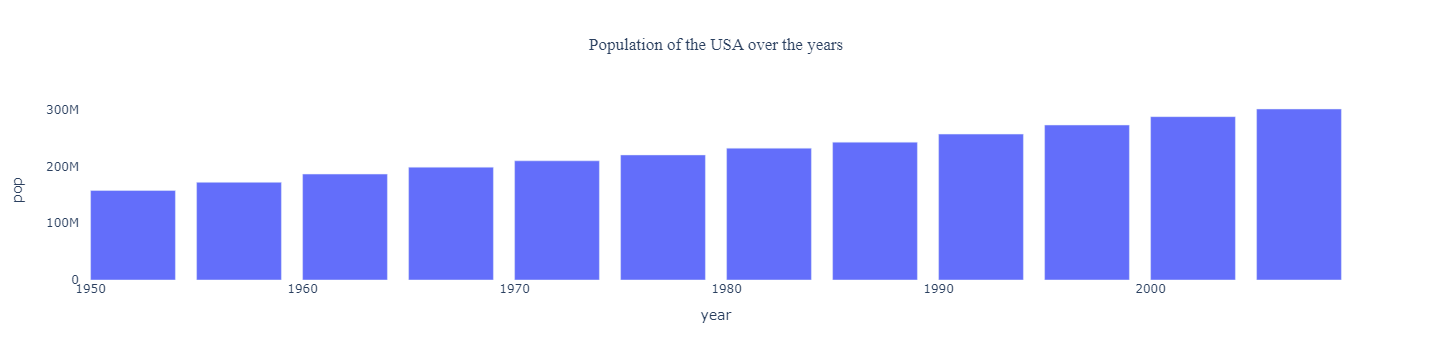

In [63]:
# changing the title's font
fig.update_layout(title_font_family = 'Times New Roman')

### Font size

Changing the size of the chart title can be done by updating the **`title_font_size`** attribute's value.

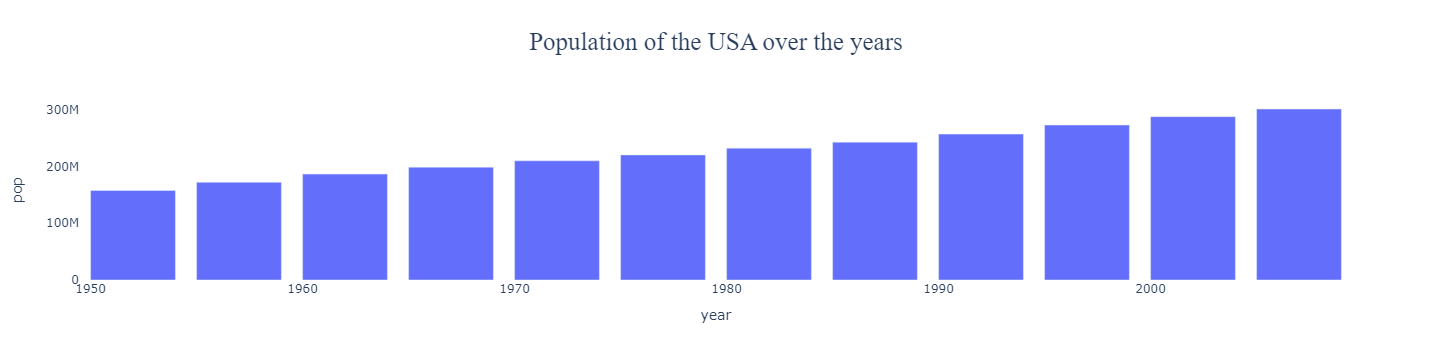

In [64]:
# attribute's value can be greater than or equal to 1
fig.update_layout(title_font_size = 25)

### Subtitle

Currently there is no built in way of adding a subtitle but HTML tags can be cleverly used for this as well. Using the `<br>` (line break) and `<sup>` (superscript) tags we can quickly make a smaller subtitle.

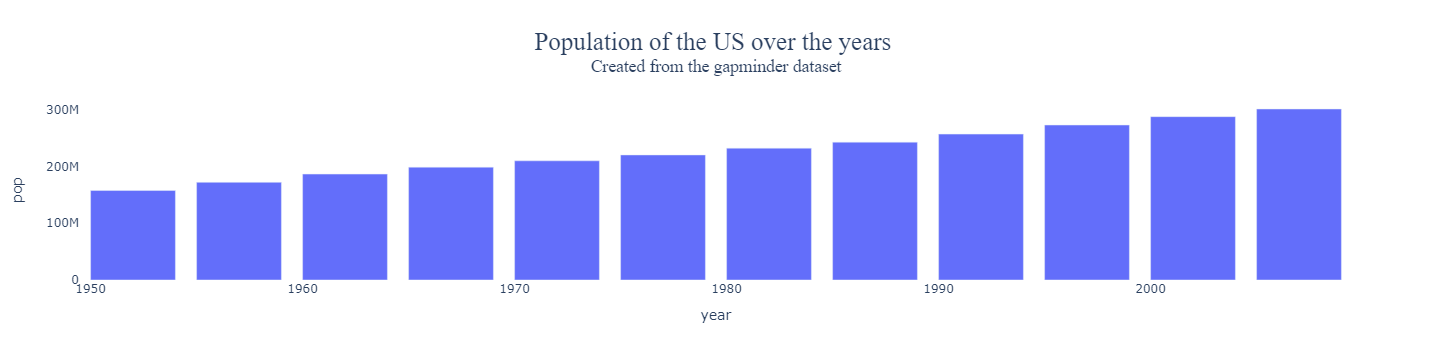

In [65]:
fig.update_layout(title_text = 'Population of the US over the years <br><sup>Created from the gapminder dataset</sup>')

### Bold title font

If we would like to make the title bold we can use the `<b>` html tag in our title text.

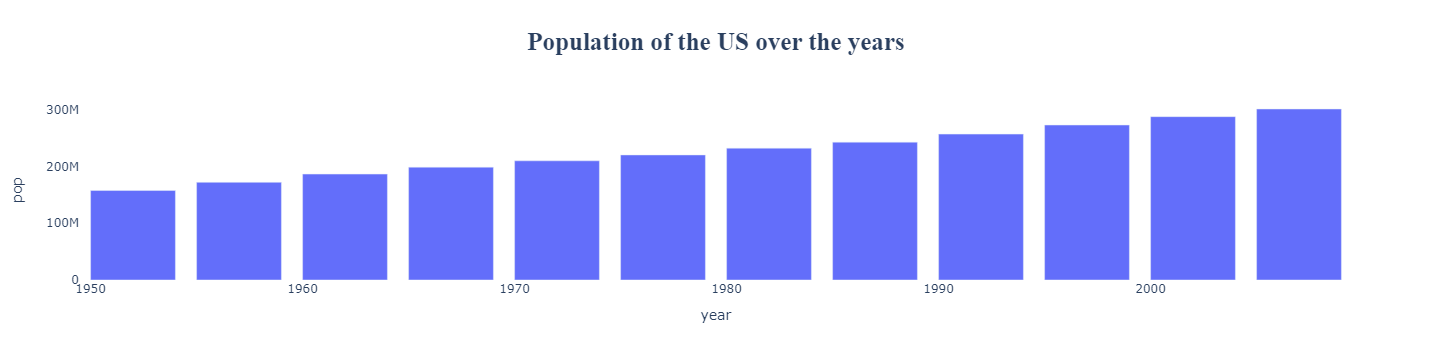

In [66]:
fig.update_layout(title_text = '<b>Population of the US over the years</b>')

### Font color

Similarly to updating the font family we can update the title's color as well with the **title_font_color** attribute

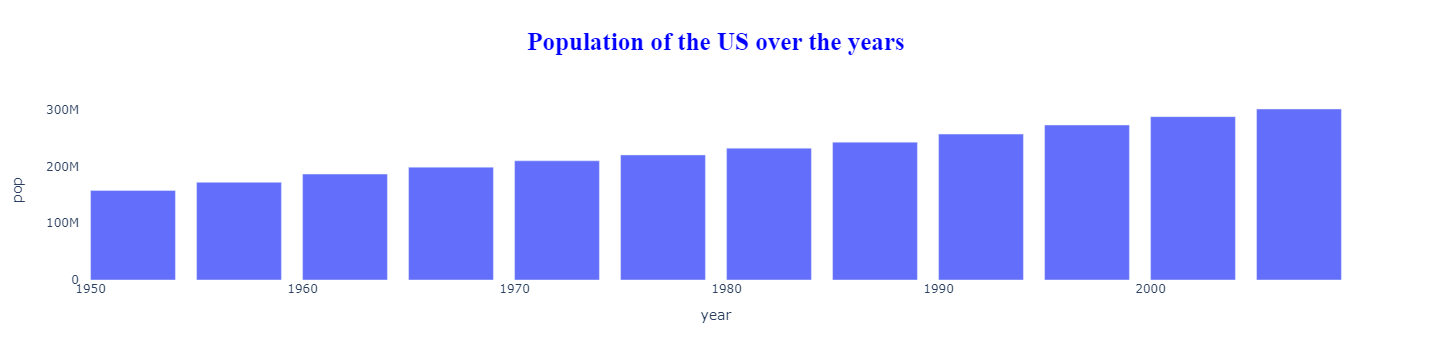

In [67]:
# changing the title's color
fig.update_layout(title_font_color = 'Blue')

## Modifying the labels

Let's also change the labels since they are still in abbreviated form.

We have a few ways to achieve this. Firstly let's take a look at the `labels` attribute.

### Labels attribute

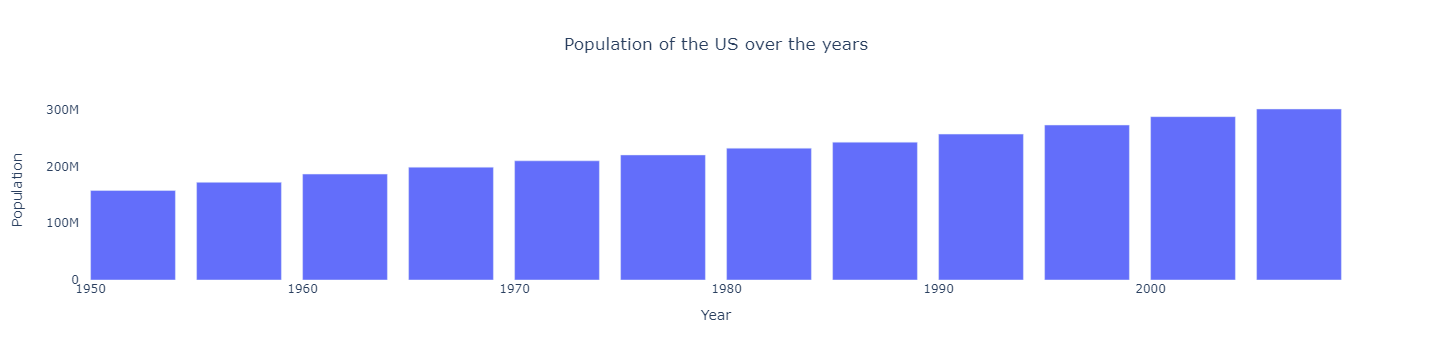

In [68]:
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = 'Population of the US over the years',
             # chart wide renaming of these strings
             labels = {'lifeExp' : 'Life Expectancy',
                        'year' : 'Year',
                        'pop' : 'Population'})

fig.update_layout(title_x = 0.5, plot_bgcolor = 'white')

fig.show()

We can also pre-declare variables to use inside our Plotly Express calls.

In [69]:
# creating a seperate dictionary for the labels
labels_ = {'lifeExp' : 'Life Expectancy',
           'year' : 'Year',
           'pop' : 'Population'}

# seperate string for the title
title_ = 'Population of the US over the years'

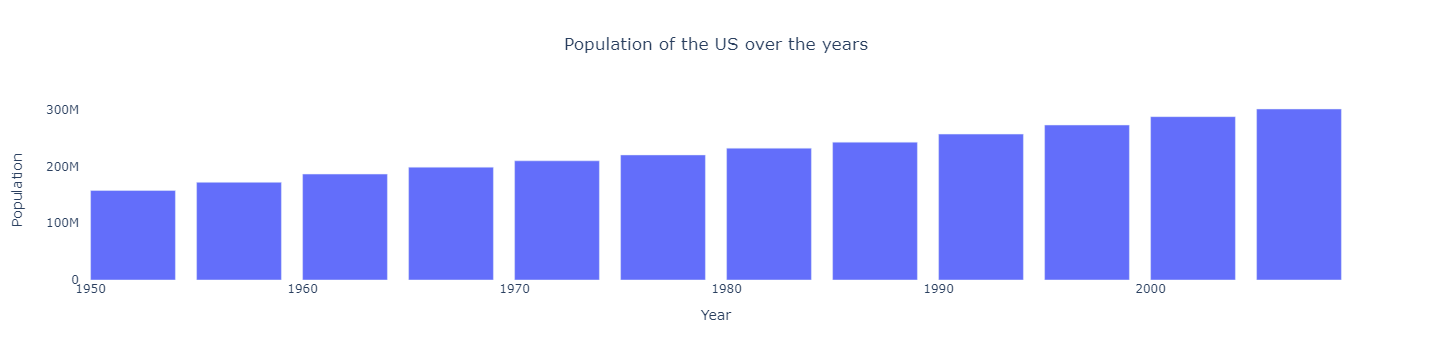

In [70]:
# using the seperate variables
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_)

fig.update_layout(title_x = 0.5, plot_bgcolor = 'white')

fig.show()

### Changing the axis titles

If we want to rename the default axis labeling only then we can:
*  update the `title_text` attribute's value in the `update_xaxes()` and `update_yaxes()` methods
*  update the `xaxis_title` or `yaxis_title` of `update_layout()`



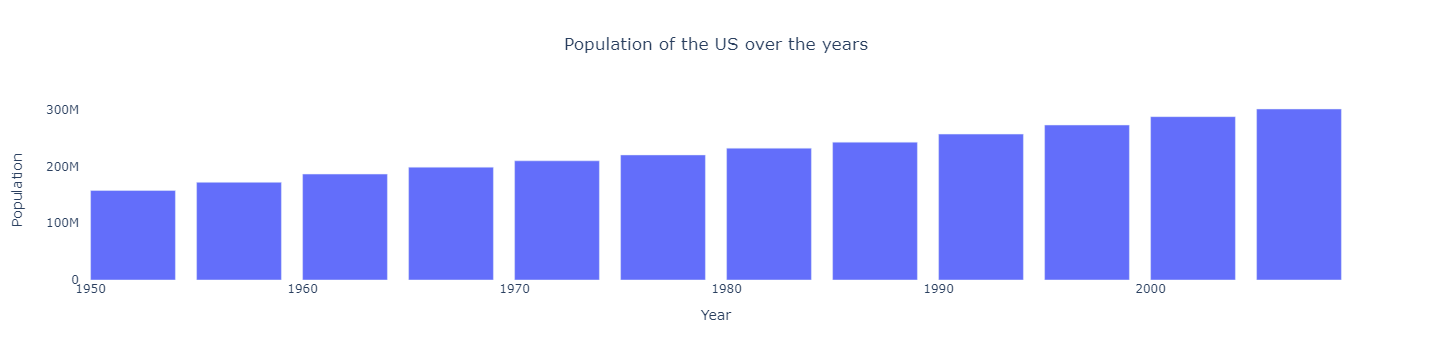

In [71]:
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_)

# this way only the axis titles change, hover menu string values stay the same
fig.update_layout(xaxis_title = 'Year', yaxis_title = 'Population',
                  title_x = 0.5, plot_bgcolor = 'white')

fig.show()

### Changing the category of the axes

We can see that because of the year values Plotly Express default the type of the x axis to date. If we want to see each year value under the bars we can change the `type` of the axis to category to be categorical.

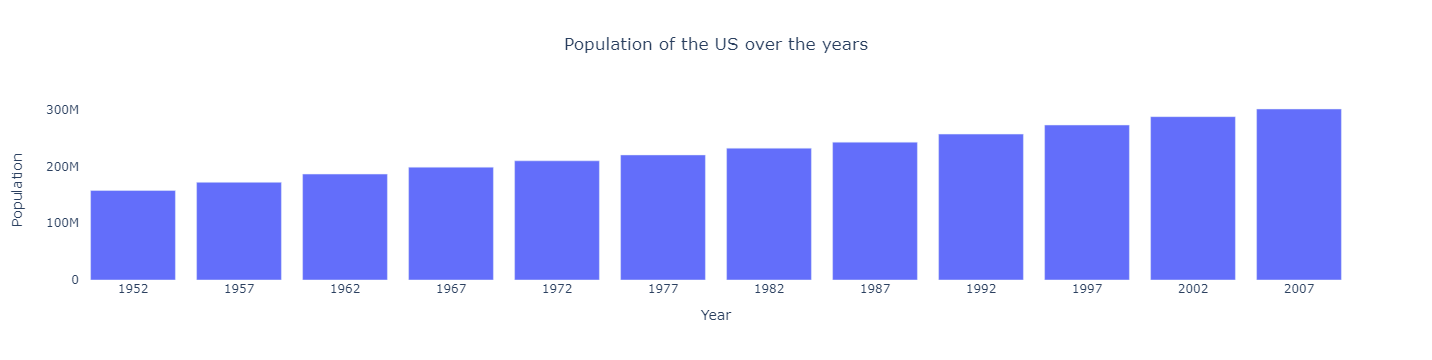

In [72]:
# changing the value of the type attribute
fig.update_xaxes(type = 'category')

## Data labels

Apart from customizing our axes labels we can also add data labels to our chart.
Let's do a modified version of the chart to show the population values on each bar.

### Adding data labels

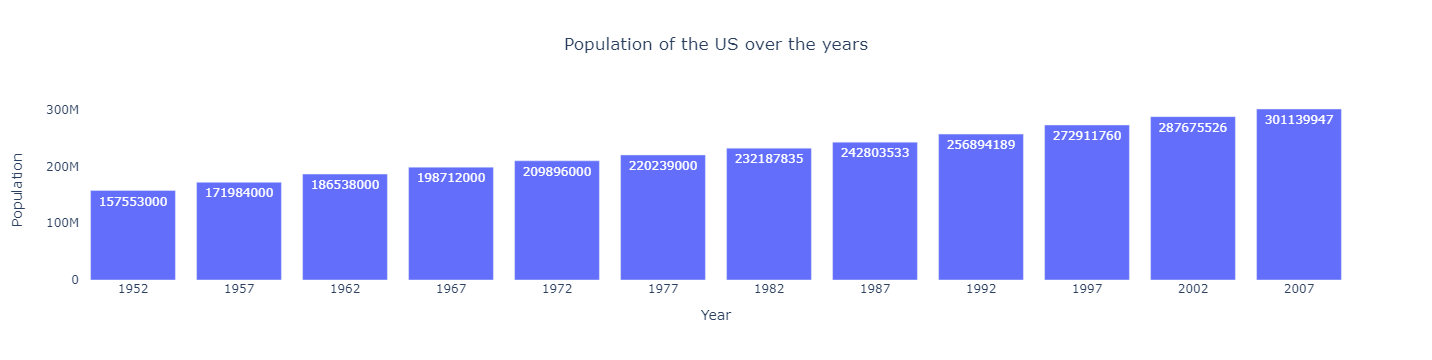

In [73]:
# using the text parameter for adding the data labels
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text = 'pop')

fig.update_layout(title_x = 0.5, plot_bgcolor = 'white')

fig.update_xaxes(type = 'category')

fig.show()

If we want to  display the y axis values as data labels on the bars then we can just use the  ***text_auto*** parameter

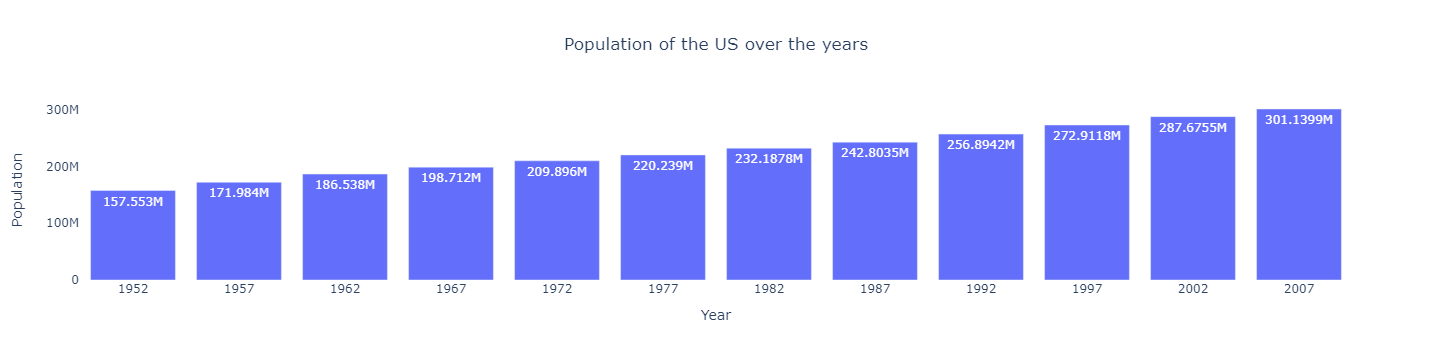

In [74]:
# using the text_auto parameter for adding the data labels
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True)

fig.update_layout(title_x = 0.5, plot_bgcolor = 'white')

fig.update_xaxes(type = 'category')

fig.show()

### Changing the format of the data labels

How can we format the data label values? We can specify the formatting using the `update_layout()` function's `yaxis_tickformat` attribute. This setting influences the formatting of the hover menu values as well.

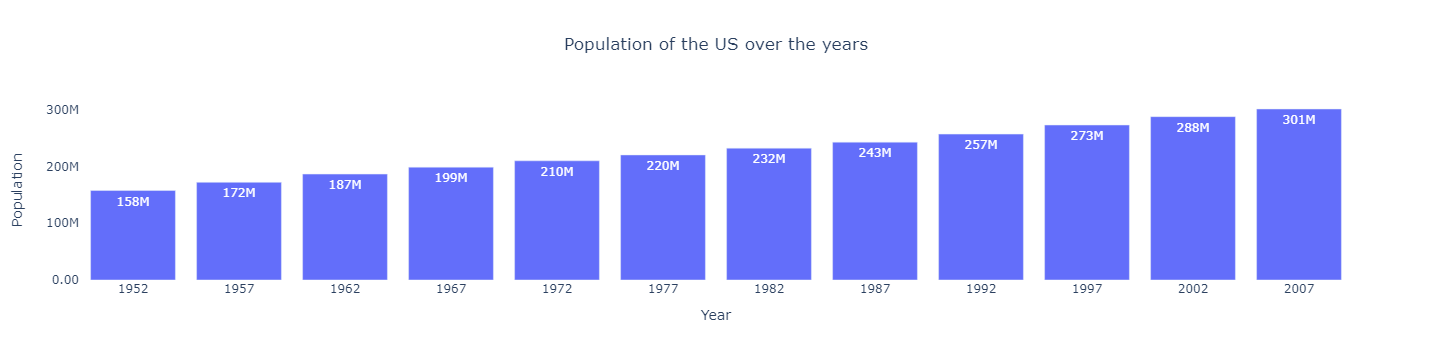

In [75]:
# using d3 format to format our data labels
fig.update_layout(yaxis_tickformat = ".3s") # decimal notation with SI-prefix

Or we can explicitly customise the data label format with the `texttemplate` attribute of `update_traces()`. This way we only influence the formatting of the data labels the hover menu values remain keep original formatting.

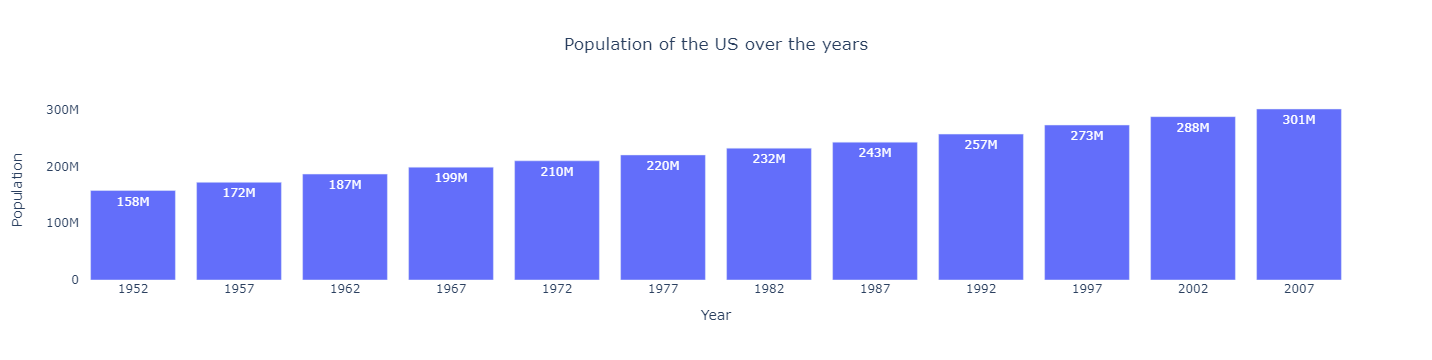

In [76]:
# resetting the chart
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True)

fig.update_layout(title_x = 0.5, plot_bgcolor = 'white')

fig.update_xaxes(type = 'category')

# using the same d3 format this time with texttemplate
fig.update_traces(texttemplate = '%{value:.3s}')

### Positioning of the data labels

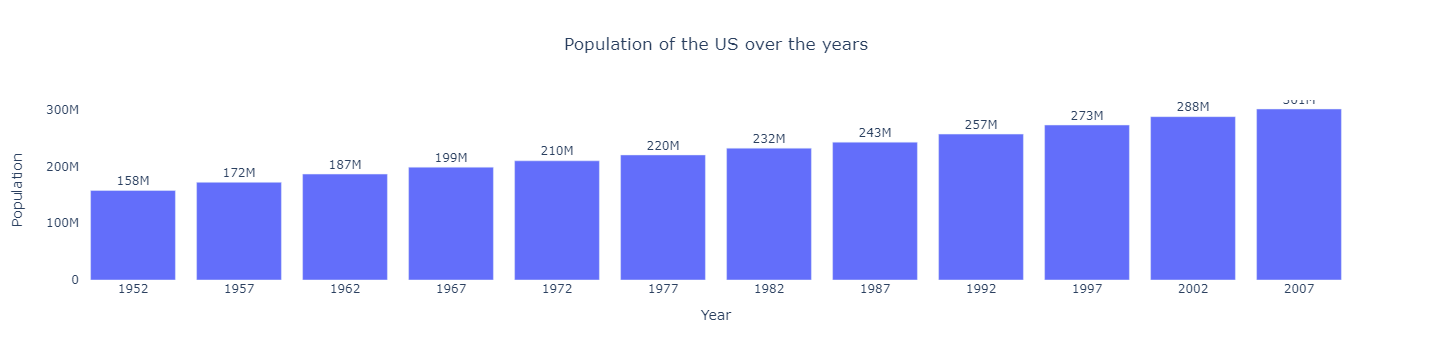

In [77]:
# updating the chart to show the data label on top of bars
fig.update_traces(textposition = 'outside')

##Setting the size of the chart

We can see that by default the charts are auto adjusted to our windows size and are quite spread out. We can solve this with setting the **autosize**, **height** and **width** values of the **update_layout()** method.

In [78]:
# creating a seperate dict for the values
chart_size = {'height' : 550, 'width' : 800}

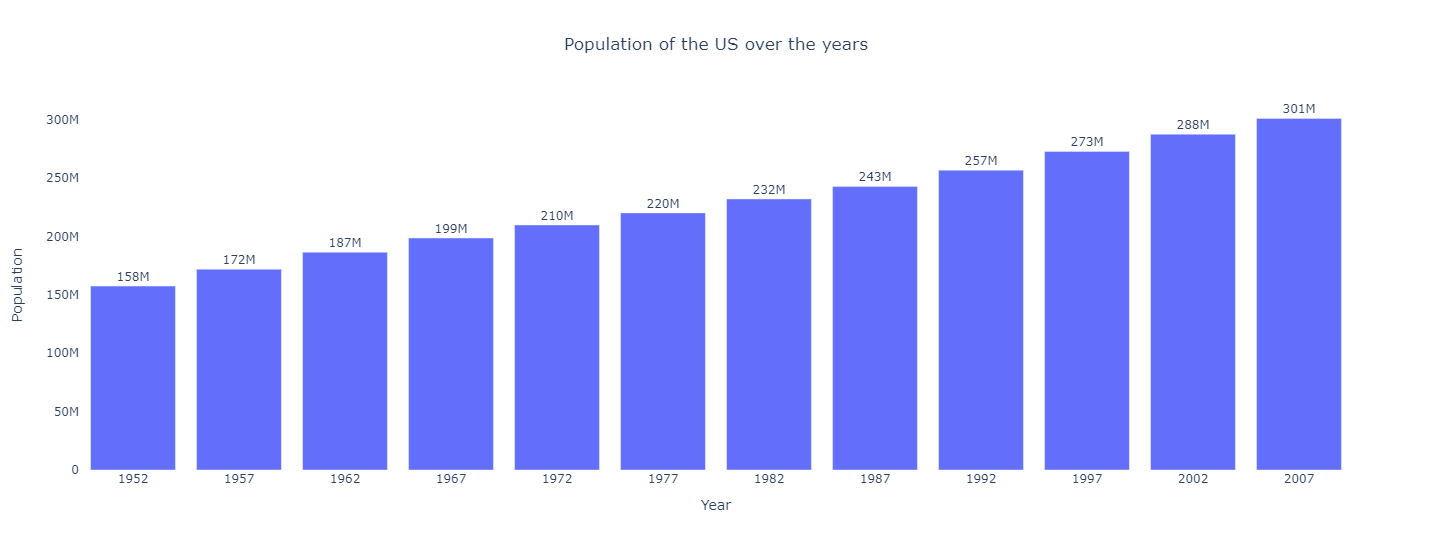

In [79]:
fig.update_layout(chart_size)

## Size of the data labels

Let's see how can we change the size of the data labels.

We can use the `textfont_size` parameter of `update_traces()` to control the maximum size of the data labels.

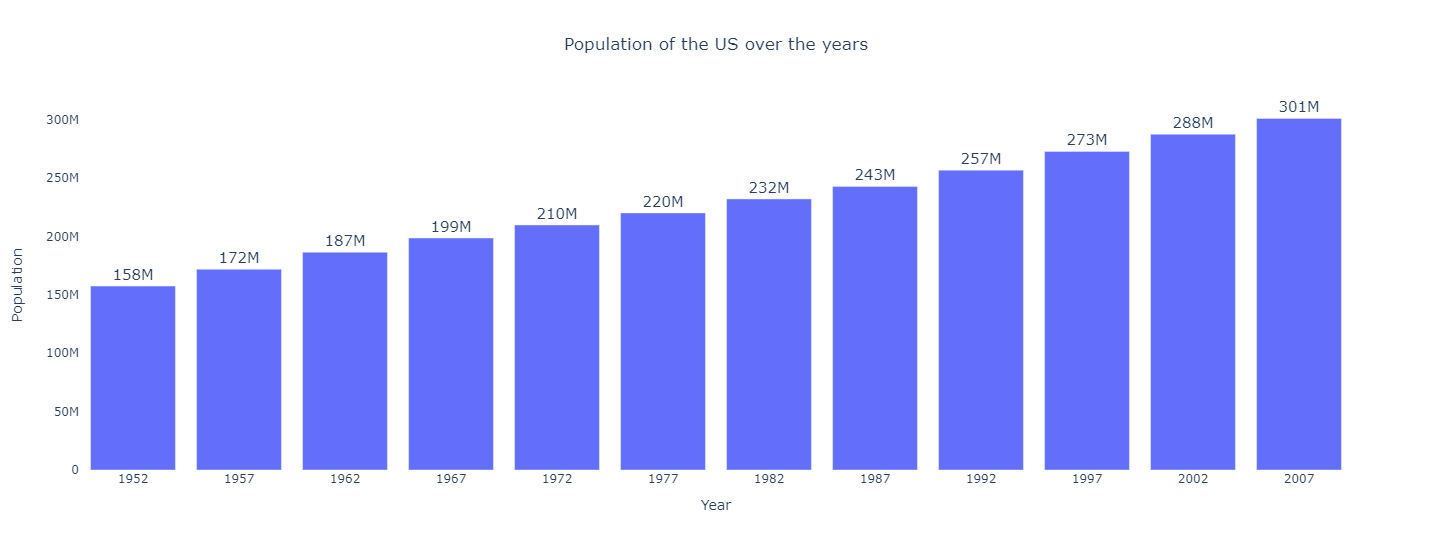

In [80]:
# setting the size of the data labels
fig.update_traces(textfont_size = 15)

## Size of the axis labels

The year and population values are a bit small as well, so let's change the size of the tick labels.

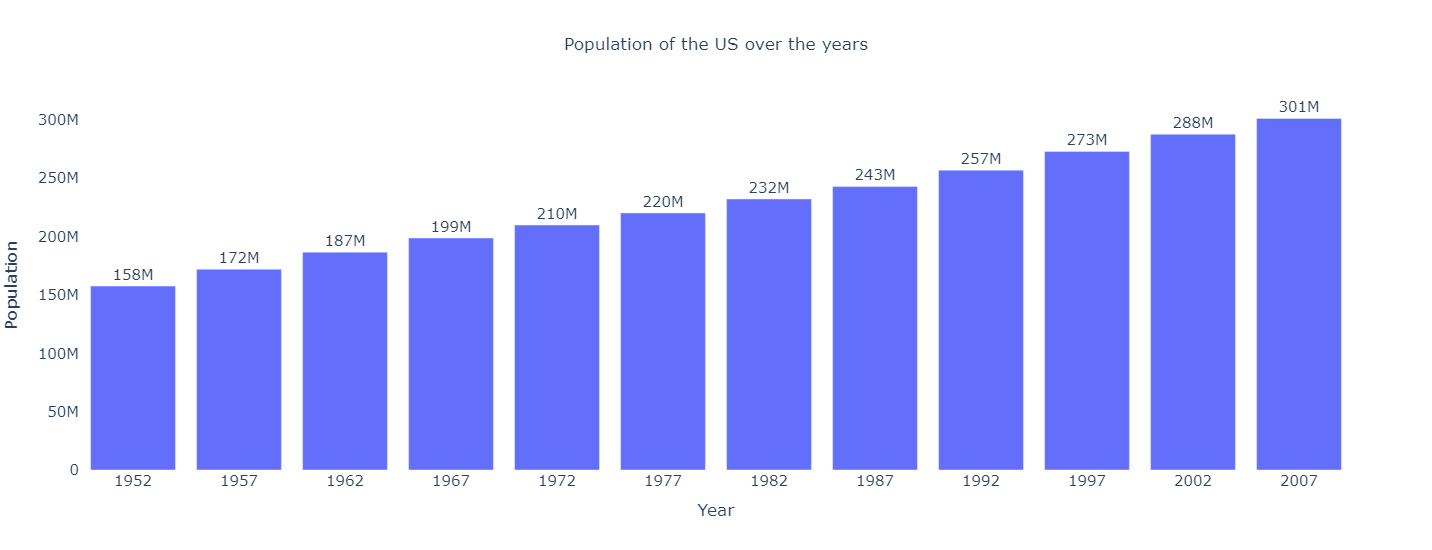

In [81]:
# setting the x axis tick font sizes to 15
fig.update_xaxes(tickfont_size = 15)

# setting the y axis tick font sizes to 15
fig.update_yaxes(tickfont_size = 15)

# setting the x axis title font size to 17
fig.update_xaxes(title_font_size = 17)

# setting the y axis title font size to 17
fig.update_yaxes(title_font_size = 17)

## Setting the general font size of the chart

If we would like all the labels on the chart to have the same size we can use the `font_size` parameter of `update_layout()`

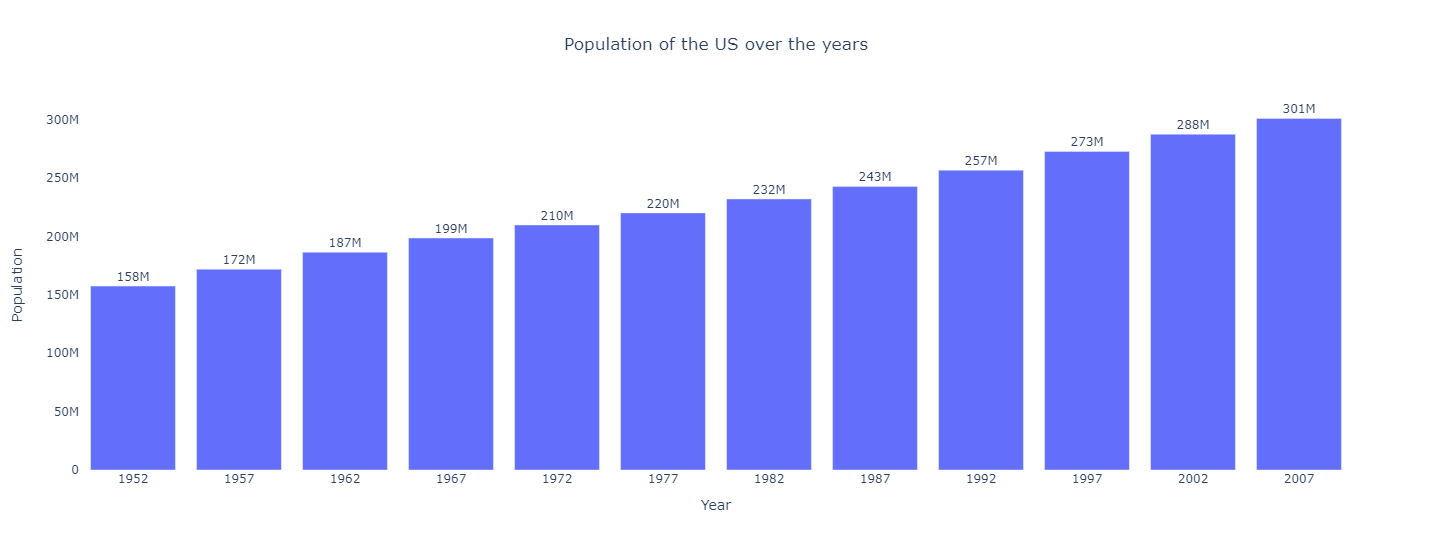

In [82]:
#resetting the chart
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True)

fig.update_layout(chart_size, title_x = 0.5, plot_bgcolor = 'white')

fig.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')

fig.update_xaxes(type = 'category')

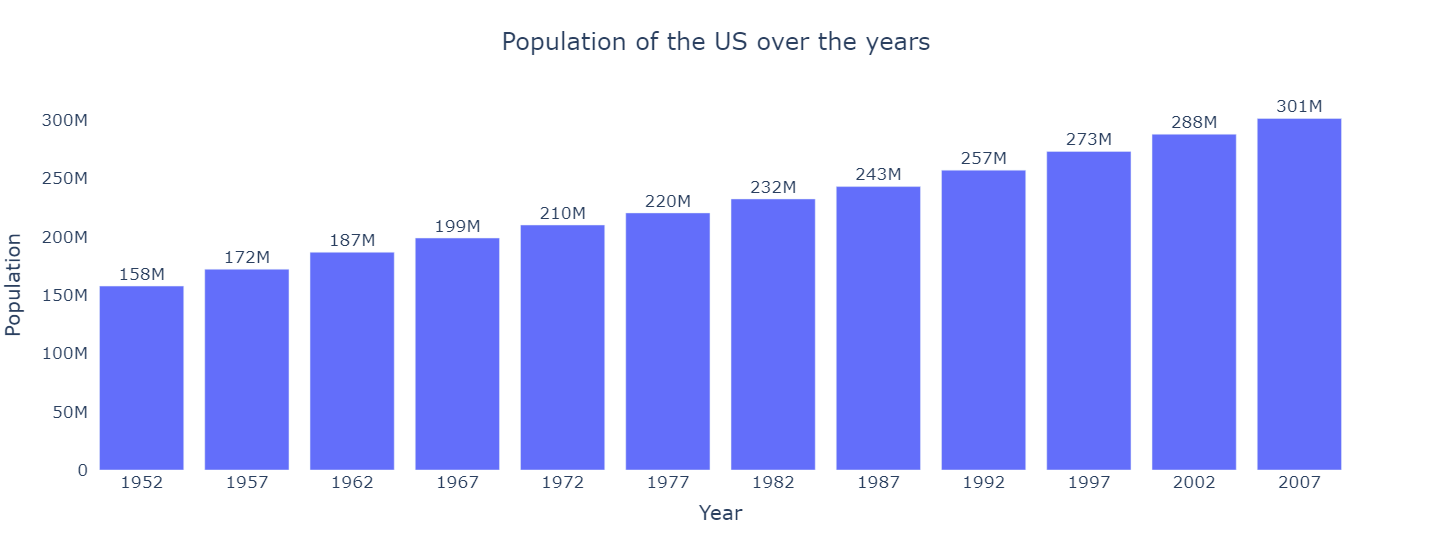

In [83]:
# setting all font sizes to 17
fig.update_layout(font_size = 17)

## Changing the coloring

### Changing the coloring of the bars

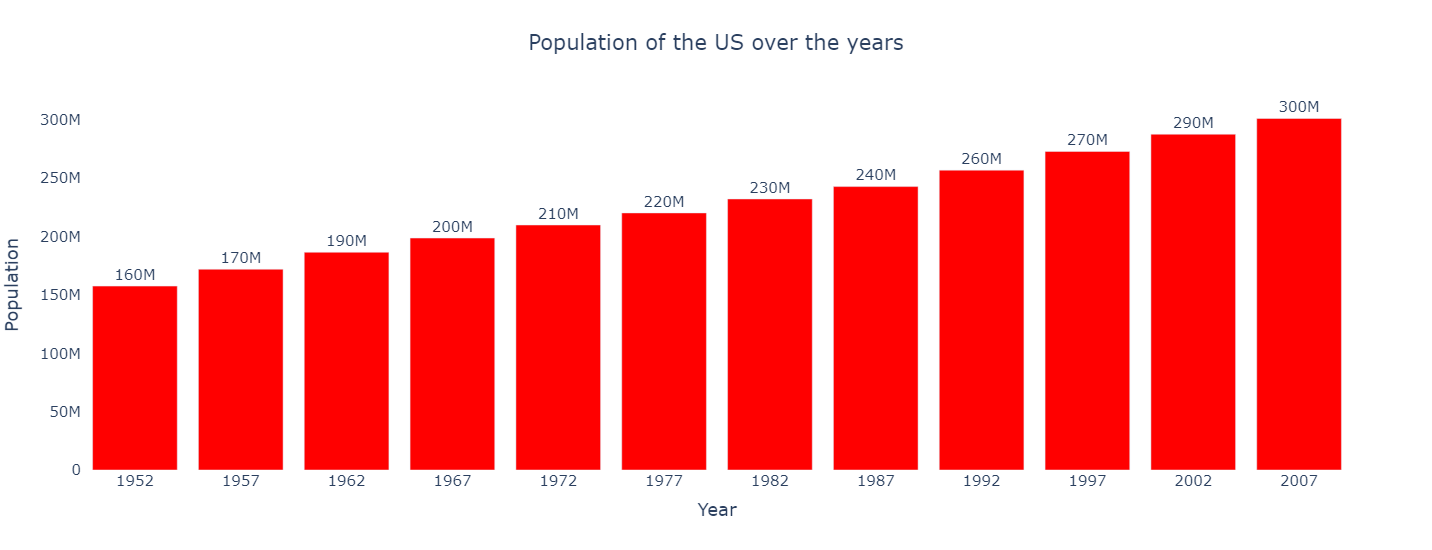

In [84]:
# using the marker_color parameter of update_traces()
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True
             )

fig.update_layout(chart_size, title_x = 0.5, font_size = 15, plot_bgcolor = 'white')

fig.update_xaxes(type = 'category')

fig.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig.update_traces(marker_color = 'red')

fig.show()

### Changing the coloring with a third column

To add a bit of color to our chart let's color our bars based on the `'lifeExp'` column's values.

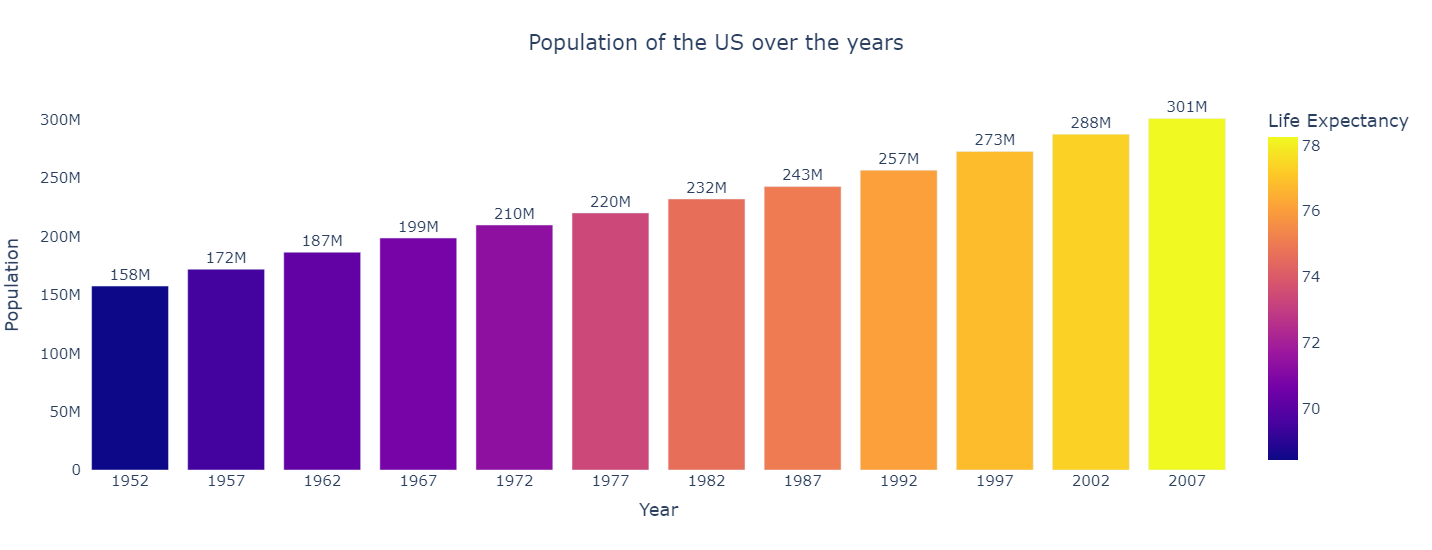

In [85]:
# adding the color attribute
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True,
             color = 'lifeExp'
             )

fig.update_layout(chart_size, title_x = 0.5, font_size = 15, plot_bgcolor = 'white')

fig.update_xaxes(type = 'category')

fig.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')

fig.show()

## Setting the template of the chart

To change the appearance of our chart even more, we can change the theme of it using the **update_layout()** method's **template** attribute.

Available templates: https://plotly.com/python/templates/

In [86]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

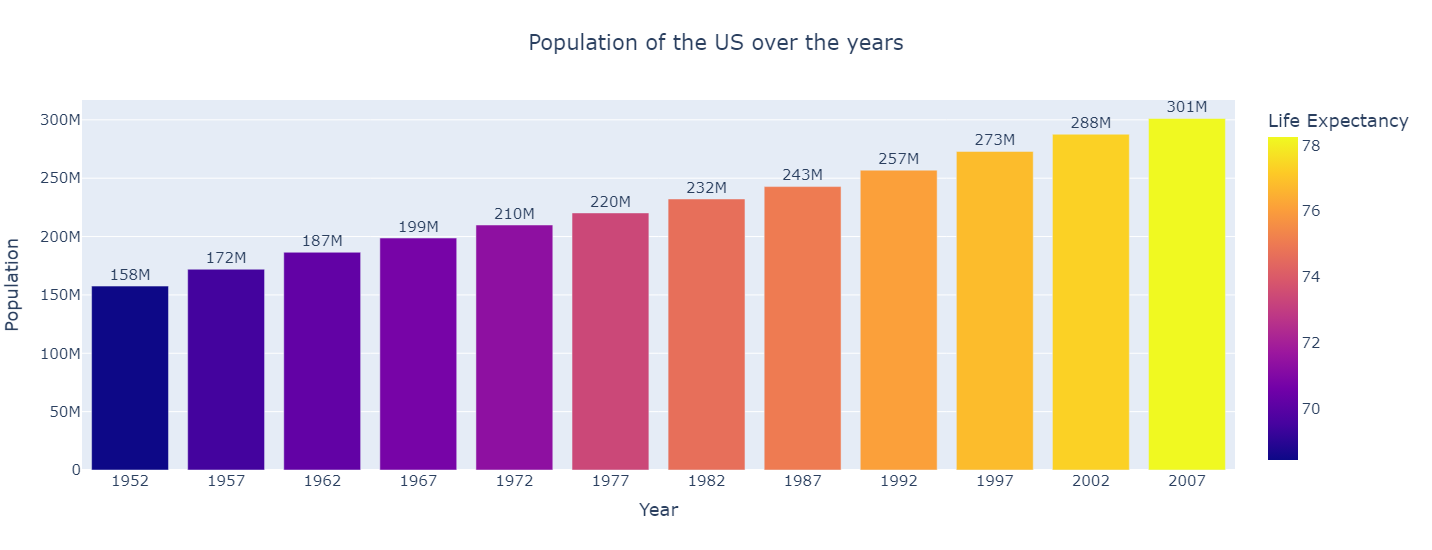

In [87]:
#resetting the chart first
fig = px.bar(df_us, x = 'year', y = 'pop',
             title = title_,
             labels = labels_,
             text_auto = True,
             color = 'lifeExp'
             )

fig.update_layout(chart_size, title_x = 0.5, font_size = 15)

fig.update_xaxes(type = 'category')

fig.update_traces(texttemplate = '%{value:.3s}', textposition = 'outside')

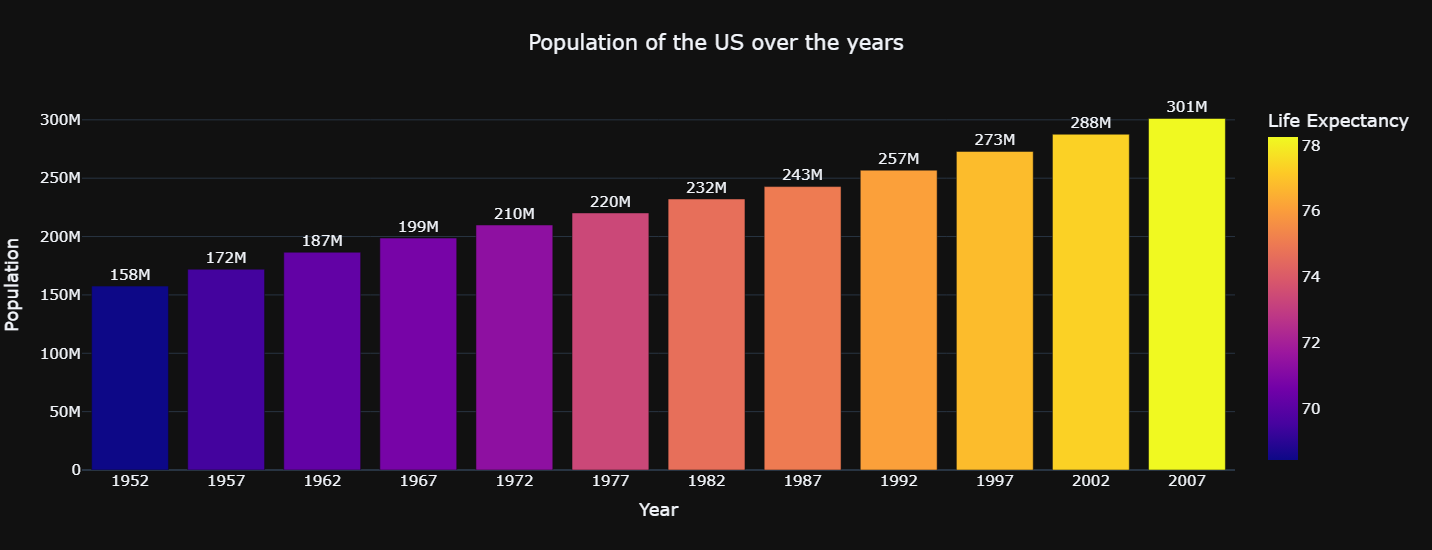

In [88]:
# setting the theme of the chart
fig.update_layout(template = 'plotly_dark')

## Remove to improve

Let's modify the axes a bit. Since we can see from the title that the chart visualizes population values in certain years the x axis title can be removed and the y axis can be completely hidden.

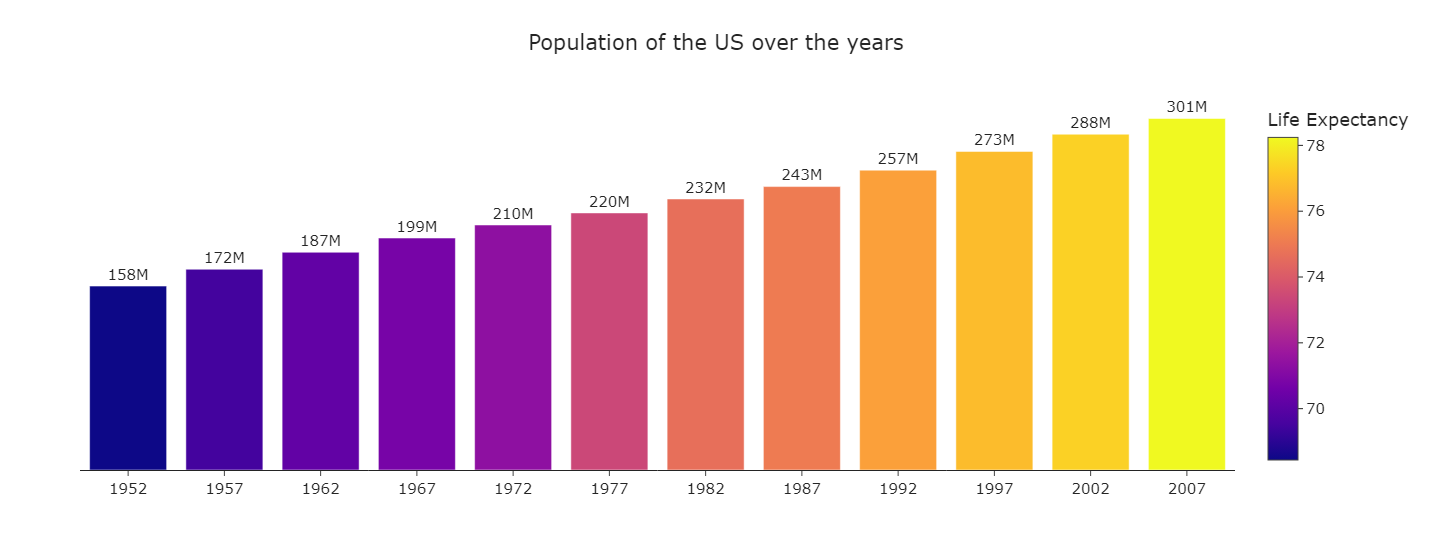

In [89]:
# setting the title text as None to remove it
fig.update_layout(xaxis_title = None, template = 'simple_white')

# hiding the y axes with the visible attribute
fig.update_yaxes(visible = False)

## Practice exercise 1

### Filtering the dataset

In [90]:
df_asia = px.data.gapminder().query('continent == "Asia" and pop > 100000000 and year == 2007')

# taking a look at the dataset
df_asia.shape

(6, 8)

### Code

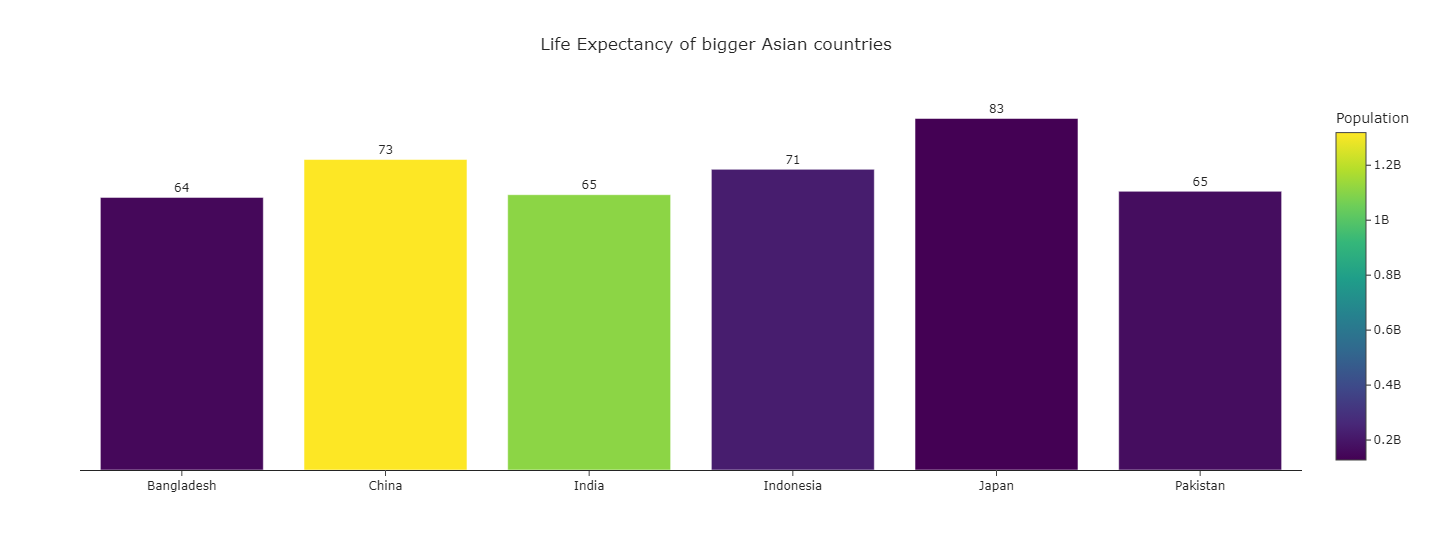

In [91]:
fig2 = px.bar(df_asia, x = 'country', y = 'lifeExp',
              color = 'pop',
              labels = {'lifeExp' : 'Life Expectancy',
                        'country' : 'Country',
                        'pop' : 'Population'},
              title = 'Life Expectancy of bigger Asian countries',
              template = 'simple_white',
              text_auto = True)

fig2.update_layout(chart_size,
                   xaxis_title = None,
                   title_x = 0.5)

fig2.update_yaxes(visible = False)

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

### Chart

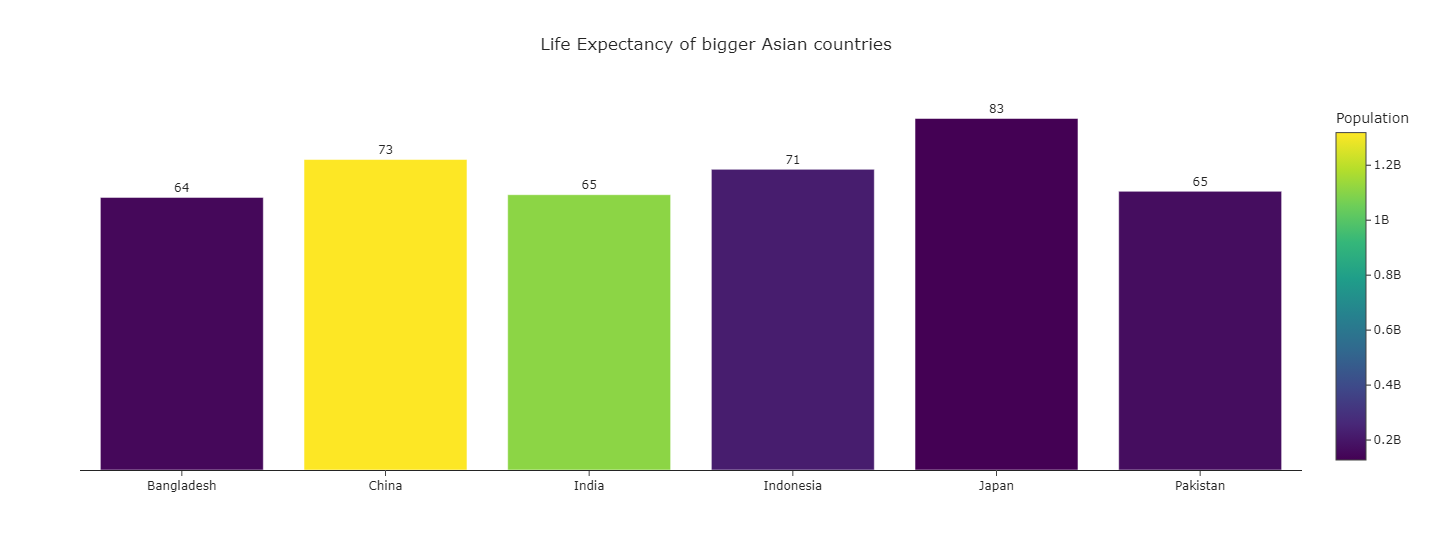

In [92]:
fig2.show()

## Horizontal bar charts

We can quickly convert an existing bar chart to be a horizontal bar chart by switching up the `x` and `y` column values and by adding the `orientation` attribute.

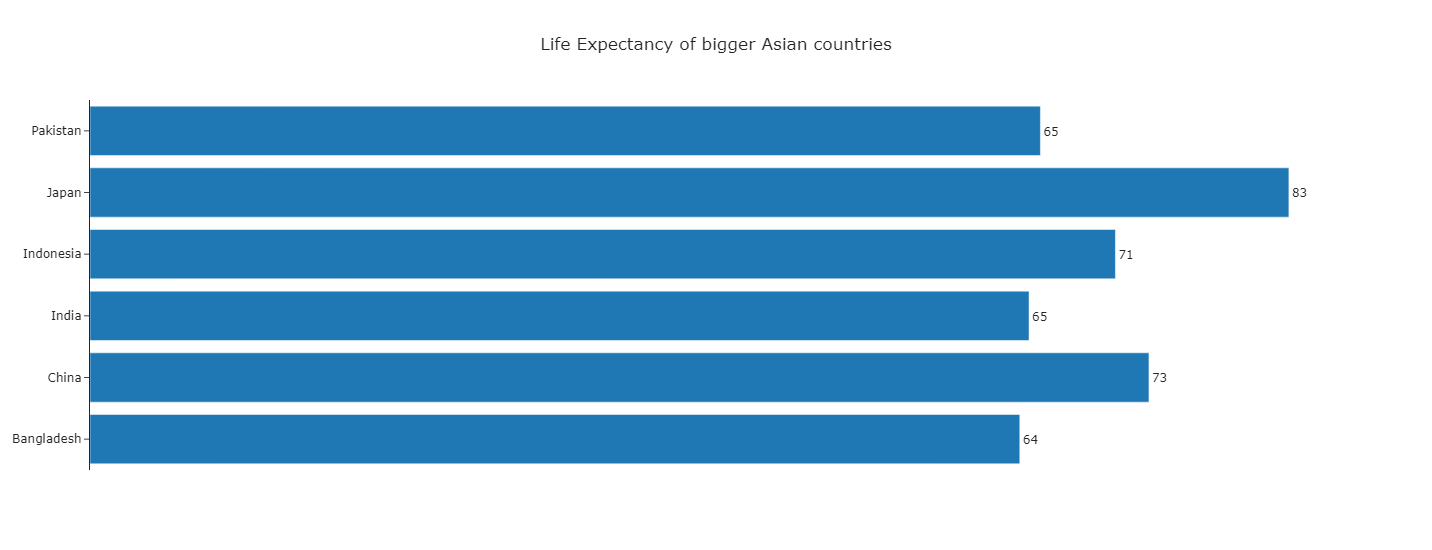

In [93]:
# adding the orientation attribute
fig2 = px.bar(df_asia, x = 'lifeExp', y = 'country',
              # color = 'pop',
              labels = {'lifeExp' : 'Life Expectancy',
                        'country' : 'Country',
                        'pop' : 'Population'},
              title = 'Life Expectancy of bigger Asian countries',
              template = 'simple_white',
              text_auto = True,
              orientation = 'h'
              )

fig2.update_layout(chart_size, xaxis_title = None, yaxis_title = None,
                   title_x = 0.5)

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

## Stacked bar charts

Stacked bar charts (SBC) show the quantitative relationship that exists between a main categorical variable and its subcategories. Each bar represents a principal category and it is divided into segments representing subcategories of a second categorical variable.

Let's create a stacked bar chart that shows the global population growth over the years. For this we are going to use a pre aggregated version of the gapminder dataset.

In [94]:
# reading the csv through Git
df_sum = pd.read_csv('https://raw.githubusercontent.com/bencearato/data/master/gaminder_summarized.csv')

# printing the first 5 rows
df_sum.head()

,Unnamed: 0,index,year,continent,pop
0,0,0,1952,Africa,237640501
1,1,1,1952,Americas,345152446
2,2,2,1952,Asia,1395357351
3,3,3,1952,Europe,418120846
4,4,4,1952,Oceania,10686006


Let's set the deafault template to simple_white so that from now on each chart renders with that theme.

In [95]:
import plotly.io as pio

# setting the default template
pio.templates.default = "simple_white"

In [96]:
# creating a dictionary for the labels
labels_ = {'continent' : 'Continent', 'pop' : 'Population', 'year' : 'Year'}

# and a string for the title
title_ = 'Population growth of the earth over the years'

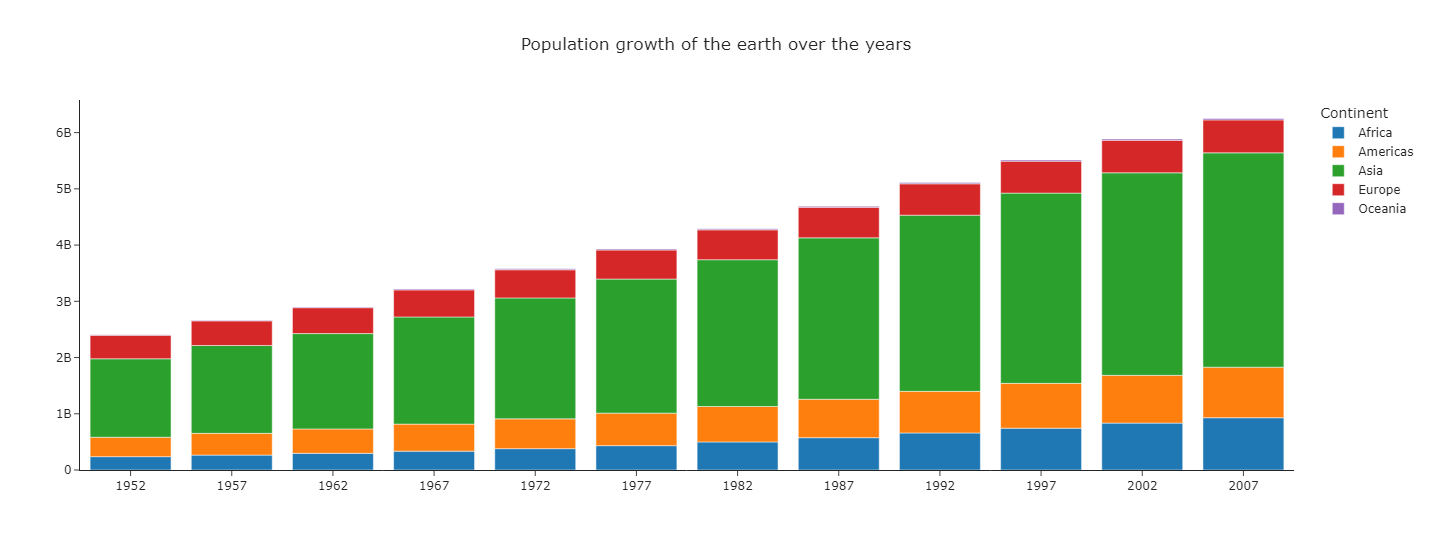

In [97]:
stackedBar = px.bar(df_sum, x = 'year', y = 'pop', color = 'continent',
                    labels = labels_, title = title_)

stackedBar.update_layout(chart_size, title_x = 0.5, xaxis_title = None, yaxis_title = None)

stackedBar.update_xaxes(type = 'category')

We can easily change the previously created stacked bar chart to be a 100% stacked bar chart.

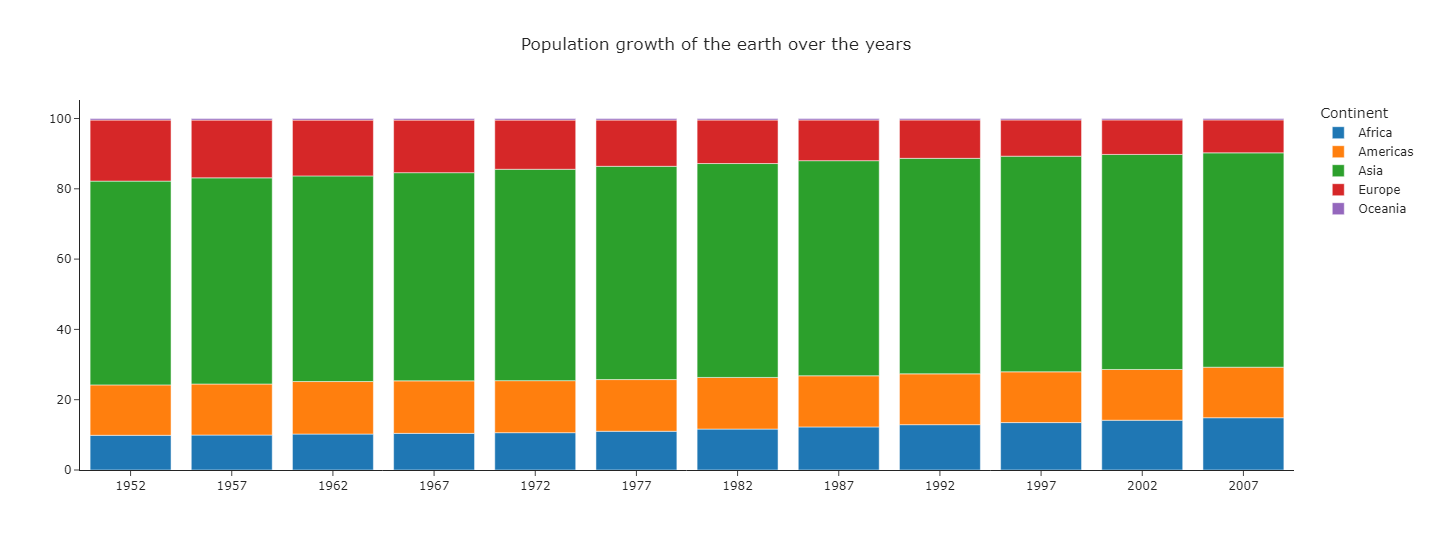

In [98]:
# changing the chart to 100% stacked using the barnorm attribute
stackedBar.update_layout(barnorm = 'percent')

##Grouped bar charts

To create grouped bar charts in Plotly we have to specify the mode of our bar chart by using the barmode parameter.

Let's visualize the change in population distribution for France, Spain and Germany before 1977 on a grouped bar chart.

In [99]:
# filtering the dataset
df_eur = px.data.gapminder().query('country in ("France", "Spain", "Germany") and year < 1977')

In [100]:
title_ = 'Population distribution of selected european countries before 1977'

labels_ = {'country' : 'Country', 'continent' : 'Continent', 'pop' : 'Population', 'year' : 'Year'}

c_orders = {'country':['Spain', 'France','Germany']}

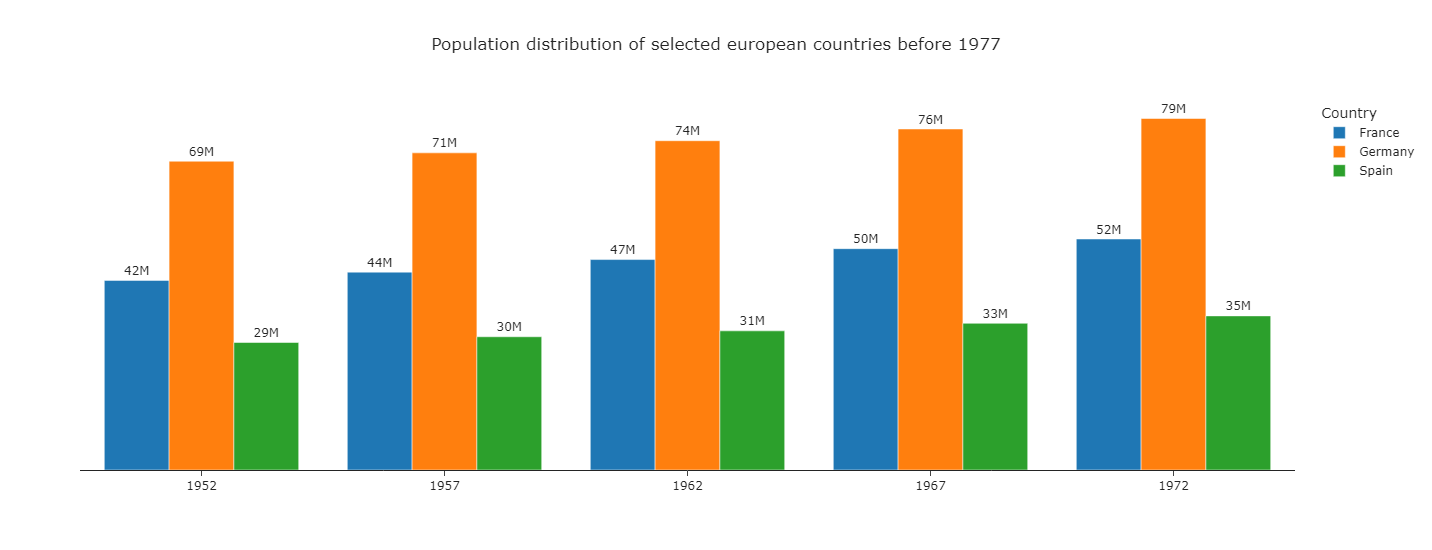

In [101]:
fig3 = px.bar(df_eur, x = 'year', y = 'pop', color = 'country',
              title = title_, labels = labels_, text_auto = True,
              barmode = 'group')

fig3.update_layout(chart_size, title_x = 0.5, xaxis_title = None)

fig3.update_yaxes(visible = False)

fig3.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

### Ordering the bars

We can use the category_orders attribute which expects a dictionary to order the bars how we want them to be.

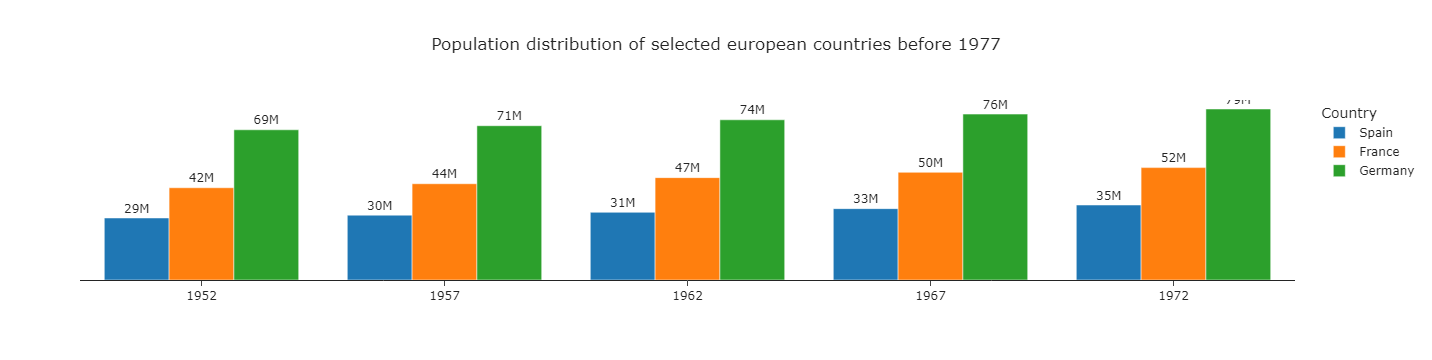

In [102]:
fig3 = px.bar(df_eur, x = 'year', y = 'pop', color = 'country',
              title = title_, labels = labels_, text_auto = True,
              barmode = 'group',
              category_orders = c_orders
              )

fig3.update_layout( title_x = 0.5, xaxis_title = None)

fig3.update_yaxes(visible = False)

fig3.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

## Practice exercise 2

### Code

In [103]:
df_tips = pd.read_csv('https://raw.githubusercontent.com/bencearato/data/master/tips_summarized.csv')

df_tips

,Unnamed: 0,day,smoker,tip
0,0,Fri,No,11.25
1,1,Fri,Yes,40.71
2,2,Sat,No,139.63
3,3,Sat,Yes,120.77
4,4,Sun,No,180.57
5,5,Sun,Yes,66.82
6,6,Thur,No,120.32
7,7,Thur,Yes,51.51


In [104]:
title_ = 'Tip amounts given daily by smokers/non smokers'

labels_ = {'smoker' : 'Smoker', 'day': 'Day', 'tip': 'Tip amount'}

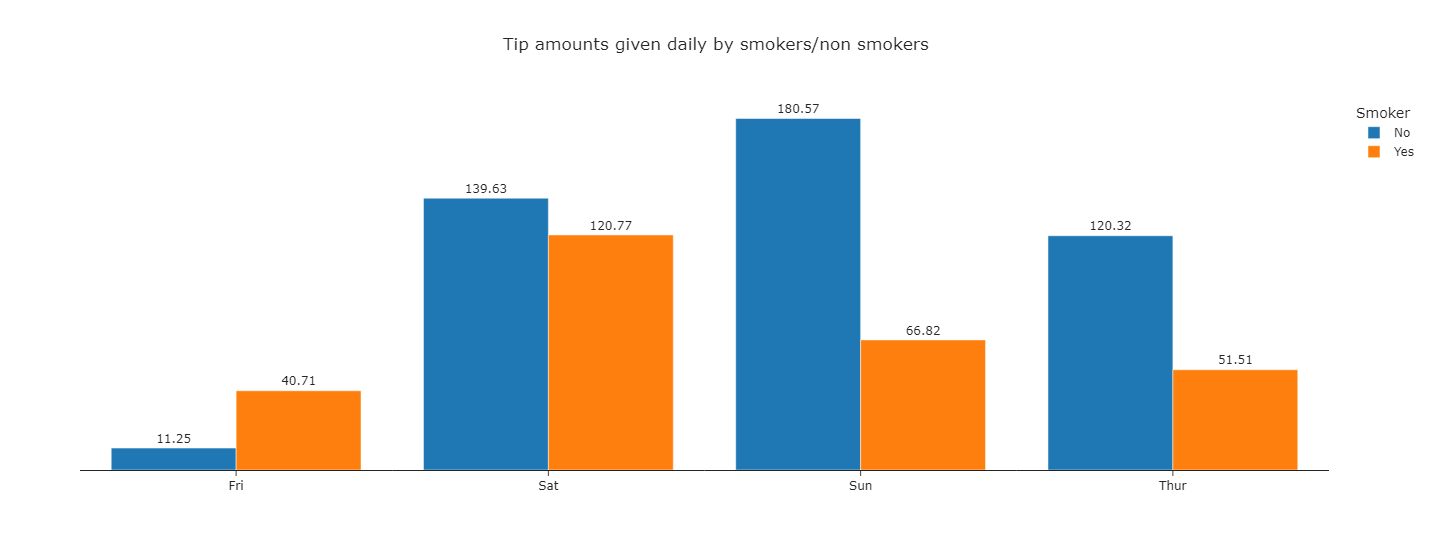

In [105]:
grouped = px.bar(df_tips, x = 'day', y = 'tip',
                 title = title_, labels = labels_,
                 color = 'smoker',text_auto = True,
                 barmode='group')

grouped.update_layout(chart_size, title_x = 0.5, xaxis_title = None,
                      template = 'simple_white')

grouped.update_yaxes(visible = False)

grouped.update_traces(textposition = 'outside')

### Chart

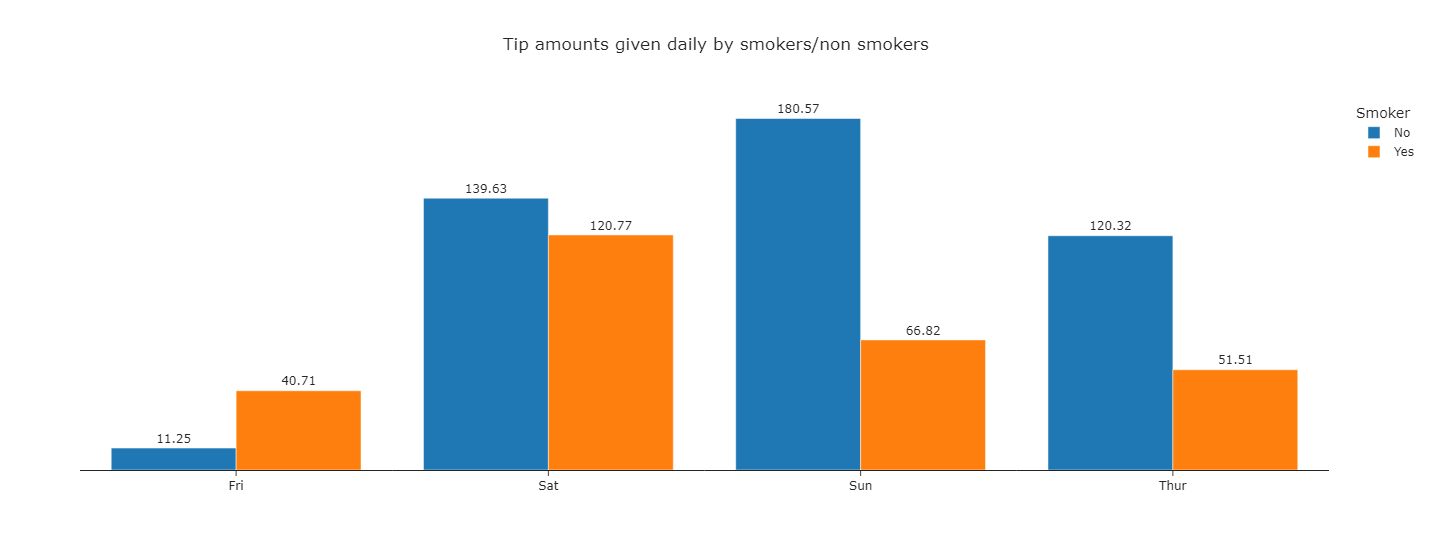

In [106]:
grouped.show()

## Practice chart with the correct categorical ordering

In [107]:
# dictionary so that the categorical values are in the order we want them to be
orders = {"day": ["Thur", "Fri", "Sat", "Sun"],
          "smoker": ["Yes", "No"]}

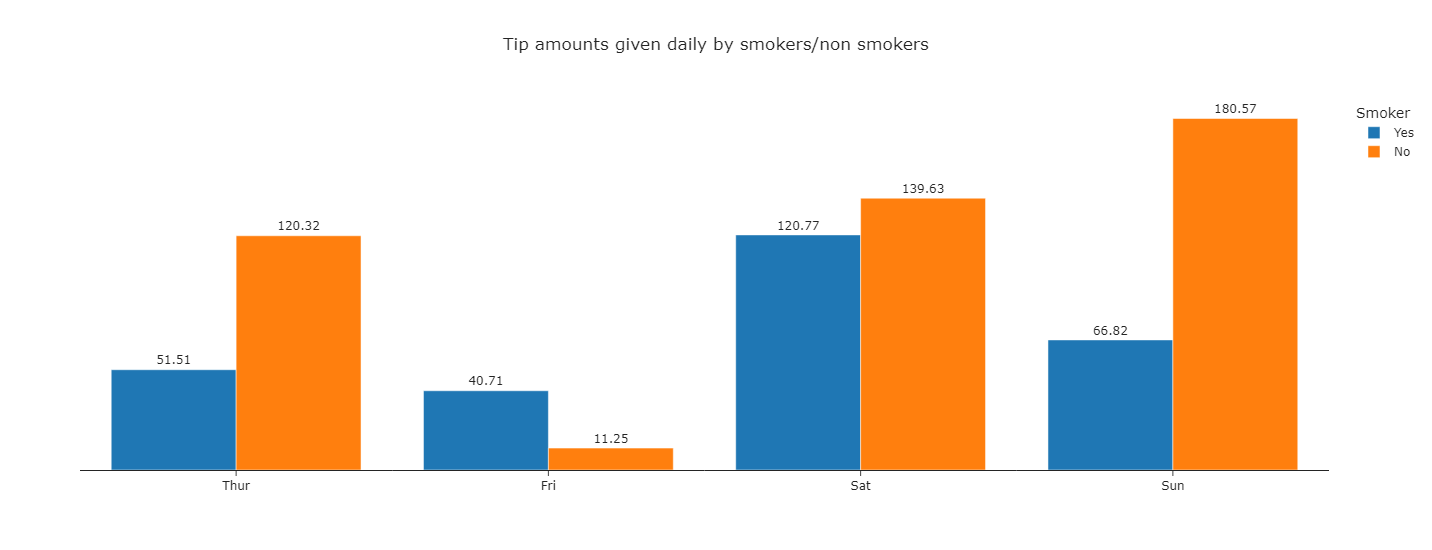

In [108]:
grouped = px.bar(df_tips, x = 'day', y = 'tip',
                 title = title_, labels = labels_,
                 color = 'smoker',text_auto = True,
                 barmode='group',
                 category_orders = orders)

grouped.update_layout(chart_size, title_x = 0.5, xaxis_title = None)

grouped.update_traces(textposition = 'outside')

# since we have data labels we dont need the y axis anymore
grouped.update_yaxes(visible = False)